In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
df['flower_name']= df.target.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [28]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','flower_name'],axis='columns')
y=df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn.predict(X_test)

array([1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 0])

In [34]:
knn.score(X_test,y_test)

1.0

In [40]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
cm =  confusion_matrix(y_test,y_predict)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

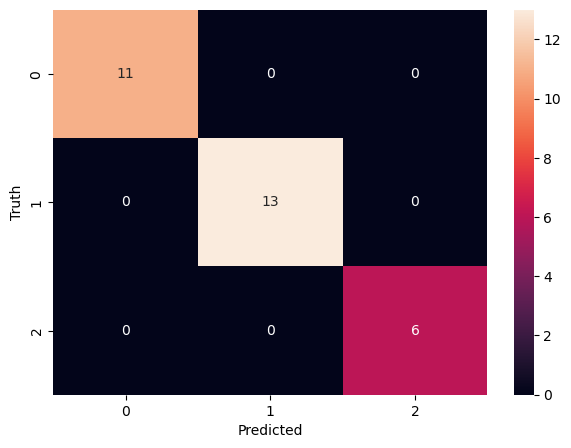

In [42]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")